---
## 하루시작 지하철 혼잡도 분석 
## Description : 
## Author : 1hera 
## Date : 2024.05.31 ~
## Detail
## Update: 
    - 2024.05.31 pdg : 프로젝트시작 
        - data laoding  및 기초 정제 
    - 2024.06.01 Pdg : 
        - 기본 세팅 함수수정
        - 주석 수정 

In [68]:

# 기본 세팅
def BasicSetting(pltStyle):
    import pandas as pd ,numpy as  np # Data manipulatioin
    import seaborn as sns,matplotlib.pyplot as plt # visiulization
    import warnings;warnings.filterwarnings('ignore') # 경고 무시 
    import platform
    from matplotlib import font_manager, rc # rc : 폰트 변경 모듈font_manager : 폰트 관리 모듈
    plt.style.use(pltStyle)
    plt.rcParams['axes.unicode_minus'] = False# unicode 설정
    if platform.system() == 'Darwin': rc('font', family='AppleGothic') # os가 macos
    elif platform.system() == 'Windows': # os가 windows
        path = 'c:/Windows/Fonts/malgun.ttf' 
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print("Unknown System")
# graph style seaborn
BasicSetting("seaborn-v0_8")



In [7]:
subway = pd.read_csv("Data/SeoulSubway.csv", encoding='euc-kr')
subway.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202404,1호선,동대문,708,7,11309,2206,9917,7632,16477,...,9476,693,3153,0,266,0,0,0,0,20240503
1,202404,1호선,동묘앞,231,1,3091,802,4051,5422,9024,...,4900,151,2459,2,322,0,0,0,0,20240503
2,202404,1호선,서울역,658,24,8560,9158,14541,62765,43682,...,14443,3203,3771,3,263,0,0,0,0,20240503
3,202404,1호선,시청,94,2,2321,5550,4123,26788,7965,...,4110,661,1172,3,40,1,0,0,0,20240503
4,202404,1호선,신설동,371,25,8785,2166,10319,9477,22808,...,9376,423,3048,0,0,0,0,0,0,20240503


In [38]:
def dataInfoProcessing(df):
    print("1. Data colum numbers : ",len(df.columns))
    #print(subway.columns)
    #print(subway.info())
    print("2. Total null:",df.isnull().sum().sum())
    for idx, col in enumerate(df.columns):
        print(f"Col{idx}[{col}] : unique {len(df[col].unique())}/ original {len(df[col])}")            
dataInfoProcessing(subway)





1. Data colum numbers :  52
2. Total null: 0
Col0[사용월] : unique 112/ original 66207
Col1[호선명] : unique 28/ original 66207
Col2[지하철역] : unique 597/ original 66207
Col3[04시-05시 승차인원] : unique 2750/ original 66207
Col4[04시-05시 하차인원] : unique 124/ original 66207
Col5[05시-06시 승차인원] : unique 15822/ original 66207
Col6[05시-06시 하차인원] : unique 6319/ original 66207
Col7[06시-07시 승차인원] : unique 25112/ original 66207
Col8[06시-07시 하차인원] : unique 19205/ original 66207
Col9[07시-08시 승차인원] : unique 40162/ original 66207
Col10[07시-08시 하차인원] : unique 30059/ original 66207
Col11[08시-09시 승차인원] : unique 41962/ original 66207
Col12[08시-09시 하차인원] : unique 41749/ original 66207
Col13[09시-10시 승차인원] : unique 34378/ original 66207
Col14[09시-10시 하차인원] : unique 35766/ original 66207
Col15[10시-11시 승차인원] : unique 29964/ original 66207
Col16[10시-11시 하차인원] : unique 30304/ original 66207
Col17[11시-12시 승차인원] : unique 29945/ original 66207
Col18[11시-12시 하차인원] : unique 29346/ original 66207
Col19[12시-13시 승차인원] : unique 3144

> Col0[사용월] : unique 112/ original 66207     
> Col1[호선명] : unique 28/ original 66207      
> Col2[지하철역] : unique 597/ original 66207   
: 총 112 개월동안의 자료 승하차 인원 자료가 있음.       
: 28개의 호선이 있음.       
: 597개의 지하철 역이있음.-> 서울시 지하철역의 개수는 302개, 수도권 지하철역 개수 712 개
: 지하철역이름이 중복되어서 괄호 버리고 rstrip 후 unique 처리 하면 543개임. 
지하철 역이름을 다시 재구성 해야할 필요가 있음. 


In [55]:
712-221


491

In [56]:
## 서울 지하철 역  
test=[]
for i in subway['지하철역'].unique():
    test.append(i.split('(')[0].rstrip())

sorted_test =[]
for i in sorted(set(test)):
    # print(i)
    sorted_test.append(i)
print(len(sorted_test))

543


> 우리집 5호선 고덕역 데이터만 보자. 


In [60]:
고덕 = subway[subway['지하철역']=='고덕']
고덕.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
125,202404,5호선,고덕,6,0,4395,1849,12763,9637,32599,...,6758,439,3047,0,106,0,0,0,0,20240503
746,202403,5호선,고덕,6,1,4237,1742,11950,9274,31774,...,6966,345,3018,1,69,0,0,0,0,20240403
1368,202402,5호선,고덕,5,0,3599,1629,10116,7744,26354,...,6202,344,2692,5,159,0,0,0,0,20240303
1988,202401,5호선,고덕,5,0,4129,1879,11265,8401,30679,...,7016,384,2557,0,127,0,0,0,0,20240203
2607,202312,5호선,고덕,11,0,3888,1639,10306,8227,27809,...,7632,404,3491,6,158,0,0,0,0,20240103


> 2024년 4월 데이터 만

In [107]:
고덕4 = 고덕[고덕['사용월']==202404]
승차col= [col   for col in 고덕4.columns if '승차' in col]
test = 고덕4[승차col]
newcol_name = {}
for i in test.columns:
    newcol_name[i]=i.split(" ")[0].replace("시","")
print(newcol_name)
test = test.rename(columns=dict(newcol_name))
print(test.columns)

{'04시-05시 승차인원': '04-05', '05시-06시 승차인원': '05-06', '06시-07시 승차인원': '06-07', '07시-08시 승차인원': '07-08', '08시-09시 승차인원': '08-09', '09시-10시 승차인원': '09-10', '10시-11시 승차인원': '10-11', '11시-12시 승차인원': '11-12', '12시-13시 승차인원': '12-13', '13시-14시 승차인원': '13-14', '14시-15시 승차인원': '14-15', '15시-16시 승차인원': '15-16', '16시-17시 승차인원': '16-17', '17시-18시 승차인원': '17-18', '18시-19시 승차인원': '18-19', '19시-20시 승차인원': '19-20', '20시-21시 승차인원': '20-21', '21시-22시 승차인원': '21-22', '22시-23시 승차인원': '22-23', '23시-24시 승차인원': '23-24', '00시-01시 승차인원': '00-01', '01시-02시 승차인원': '01-02', '02시-03시 승차인원': '02-03', '03시-04시 승차인원': '03-04'}
Index(['04-05', '05-06', '06-07', '07-08', '08-09', '09-10', '10-11', '11-12',
       '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20',
       '20-21', '21-22', '22-23', '23-24', '00-01', '01-02', '02-03', '03-04'],
      dtype='object')


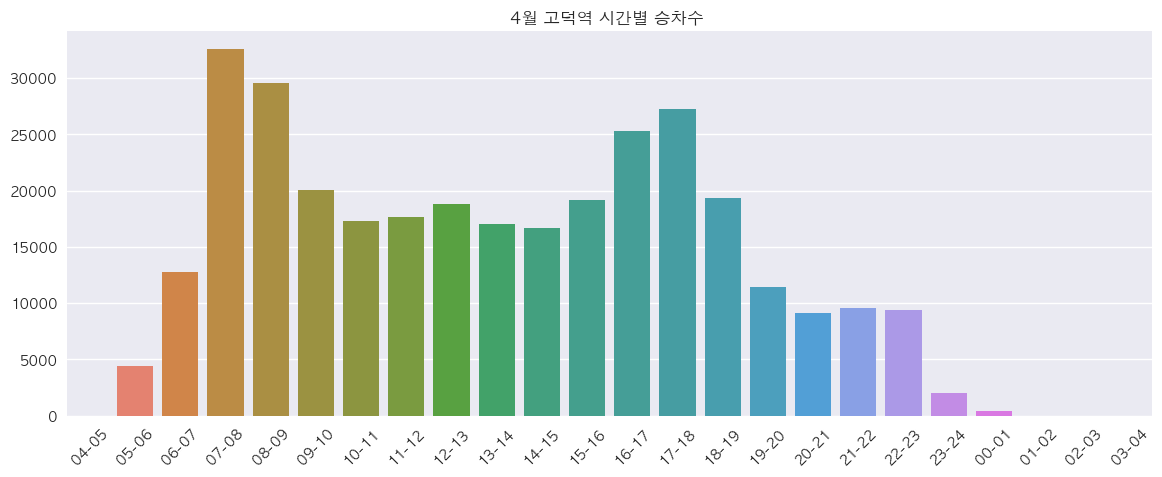

In [112]:
import seaborn as sns
plt.figure(figsize=(14,5))
sns.barplot(
    
    data = test,
    
    
)
plt.xticks(rotation=45)
plt.title('4월 고덕역 시간별 승차수 ')
plt.show()